## Import Packages

In [19]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)

# Shape Of Dataset
print("Size Of Dataset: ", iris.shape,"\n")

# Top rows of Dataset
print("Data is like:\n ", iris.head(),"\n")

#class distribution
print(iris.groupby('class').size())

Size Of Dataset:  (150, 5) 

Data is like:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Description Of Analysis

In [24]:
iris['sep_pet_lenth'] = iris['sepal-length']/iris['petal-length']
iris['sep_pet_with'] = iris['sepal-width']/iris['petal-width']

In [25]:
print("Statistical Description of data:\n ", iris.describe())

Statistical Description of data:
         sepal-length  sepal-width  petal-length  petal-width  sep_pet_lenth  \
count    150.000000   150.000000    150.000000   150.000000     150.000000   
mean       5.843333     3.054000      3.758667     1.198667       2.016495   
std        0.828066     0.433594      1.764420     0.763161       1.059604   
min        4.300000     2.000000      1.000000     0.100000       1.050000   
25%        5.100000     2.800000      1.600000     0.300000       1.230469   
50%        5.800000     3.000000      4.350000     1.300000       1.410603   
75%        6.400000     3.300000      5.100000     1.800000       3.176471   
max        7.900000     4.400000      6.900000     2.500000       4.833333   

       sep_pet_with  
count    150.000000  
mean       6.697701  
std        8.054875  
min        1.130435  
25%        1.602778  
50%        2.148352  
75%       11.583333  
max       41.000000  


## Box and Whisker plots

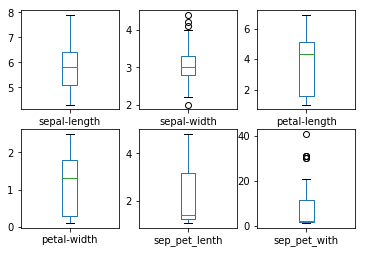

In [34]:
iris.plot(kind ="box",subplots =True,layout= (2,3), sharex=False, sharey=False)
plt.show()

## Histograms

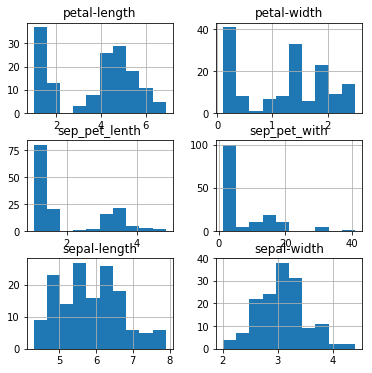

In [35]:
iris.hist(figsize= (6,6))
plt.show()

## Scatter plot matrix

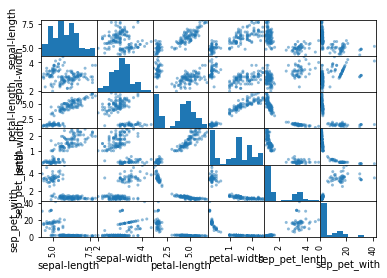

In [36]:
scatter_matrix(iris)
plt.show()

In [62]:
scaler = StandardScaler()
iris[['sepal-length','sepal-width','petal-length','petal-width','sep_pet_lenth','sep_pet_with']] = scaler.fit_transform(iris[['sepal-length','sepal-width','petal-length','petal-width','sep_pet_lenth','sep_pet_with']])

## Train-Test Split

In [56]:
import numpy as np
array = iris.values
X = np.delete(array,4,1)
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [64]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class,sep_pet_lenth,sep_pet_with
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,1.540019,1.345581
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,1.404746,1.034170
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,1.514005,1.158735
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,0.994418,1.096452
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,1.472382,1.407863


### Create Model Shell

In [65]:
models =[]

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


## Testing each model on our IRIS dataset

In [66]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.983333 (0.033333)
LDA: 0.983333 (0.033333)
KNN: 0.966667 (0.055277)
CART: 0.966667 (0.040825)
RF: 0.983333 (0.033333)
NB: 0.983333 (0.033333)
SVM: 0.983333 (0.033333)


## Graphical Comaprision Of results

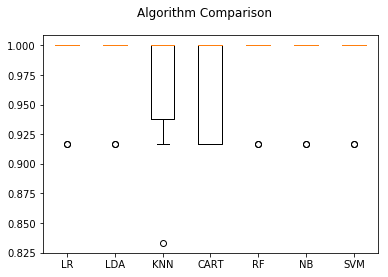

In [67]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make Predication on Validation Set

In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



SVM

In [72]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

